#  Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = None
pd.options.display.max_columns = None


# *Wrangle Function Used in Data Cleaning*

In [2]:
def wrangle(filename, encoding = None, dropna_columnnames =None, change_column_name=None,date_column = None, remove_duplicated_rows_columnsname = None):

    # Loading Data from csv file
    df = pd.read_csv(filename,encoding=encoding)
    
    # Delete Orders NaN Rows
    df.dropna(subset=dropna_columnnames, inplace=True)
   
    # Rename Columns 
    df.rename(columns=change_column_name, inplace=True)
    
    # Change OrderDate and ID Columns type to Date , Integer
    df[date_column] = pd.to_datetime(df[date_column])

    #Drop dupliacted rows
    df = df.drop_duplicates(subset= remove_duplicated_rows_columnsname)

    #Strip and lowercase columns names
    df.columns = df.columns.str.strip().str.lower()

    
    return df

### Issues:
* Delete orders with NaN values
* Rename `City.1, Country.1, Phon.1` Columns
* Change `OrderDate` Type into Date
* Change ID Columns, and OrderNumber column to integer

In [3]:
# Loading
df = wrangle(filename='all_data.csv',encoding='ISO-8859-1',dropna_columnnames=['OrderID'],change_column_name={'City.1': 'SuppCity', 'Country.1': 'SuppCountry','Phone.1':'SuppPhone'},date_column='OrderDate' ,remove_duplicated_rows_columnsname=['OrderID'])



In [4]:
df.head()

,customerid,firstname,lastname,city,country,phone,orderid,orderdate,ordernumber,totalamount,productid,productname,unitprice,package,isdiscontinued,supplierid,companyname,contactname,suppcity,suppcountry,suppphone,fax
0,85.00,Paul,Henriot,Reims,France,26.47.15.10,1.00,2012-07-04,"542,378.00",440.00,11.00,Queso Cabrales,21.00,1 kg pkg.,False,5.00,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Oviedo,Spain,(98) 598 76 54,NaN
3,79.00,Karin,Josephs,Münster,Germany,0251-031259,2.00,2012-07-05,"542,379.00","1,863.40",14.00,Tofu,23.25,40 - 100 g pkgs.,False,6.00,Mayumi's,Mayumi Ohno,Osaka,Japan,(06) 431-7877,NaN
5,34.00,Mario,Pontes,Rio de Janeiro,Brazil,(21) 555-0091,3.00,2012-07-08,"542,380.00","1,813.00",41.00,Jack's New England Clam Chowder,9.65,12 - 12 oz cans,False,19.00,New England Seafood Cannery,Robb Merchant,Boston,USA,(617) 555-3267,(617) 555-3389
8,84.00,Mary,Saveley,Lyon,France,78.32.54.86,4.00,2012-07-08,"542,381.00",670.80,22.00,Gustaf's Kn?ckebr?d,21.00,24 - 500 g pkgs.,False,9.00,PB Kn?ckebr?d AB,Lars Peterson,G?teborg,Sweden,031-987 65 43,031-987 65 91
11,76.00,Pascale,Cartrain,Charleroi,Belgium,(071) 23 67 22 20,5.00,2012-07-09,"542,382.00","3,730.00",20.00,Sir Rodney's Marmalade,81.00,30 gift boxes,False,8.00,"Specialty Biscuits, Ltd.",Peter Wilson,Manchester,UK,(161) 555-4448,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 2130
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customerid      830 non-null    float64       
 1   firstname       830 non-null    object        
 2   lastname        830 non-null    object        
 3   city            830 non-null    object        
 4   country         830 non-null    object        
 5   phone           830 non-null    object        
 6   orderid         830 non-null    float64       
 7   orderdate       830 non-null    datetime64[ns]
 8   ordernumber     830 non-null    float64       
 9   totalamount     830 non-null    float64       
 10  productid       830 non-null    float64       
 11  productname     830 non-null    object        
 12  unitprice       830 non-null    float64       
 13  package         830 non-null    object        
 14  isdiscontinued  830 non-null    object        
 15  supplierid

In [6]:
for cols in df.columns:
    if 'id' in cols or 'ordernumber' in cols:
        df[cols]= df[cols].astype(int)

orders = df[['customerid','firstname','lastname','city','country', 'orderid', 'ordernumber', 'orderdate', 'totalamount' ]]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   830 non-null    int32         
 1   firstname    830 non-null    object        
 2   lastname     830 non-null    object        
 3   city         830 non-null    object        
 4   country      830 non-null    object        
 5   orderid      830 non-null    int32         
 6   ordernumber  830 non-null    int32         
 7   orderdate    830 non-null    datetime64[ns]
 8   totalamount  830 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(3), object(4)
memory usage: 55.1+ KB


# EDA
### Univariate Analysis


In [7]:
#  Quantitaive Data
#  Describe TotalAmount Column
orders[['totalamount']].describe().T

,count,mean,std,min,25%,50%,75%,max
totalamount,830.00,"1,631.88","1,990.61",12.50,480.00,"1,015.90","2,028.65","17,250.00"


In [8]:
orders.select_dtypes('object').nunique()

firstname    84
lastname     88
city         69
country      21
dtype: int64

Text(0.5, 0, 'Total Amount')

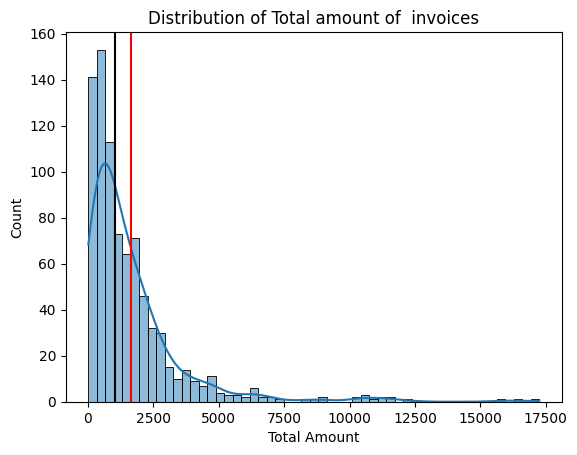

In [9]:
sns.histplot(data=orders, x='totalamount',kde=True)
plt.axvline(orders.totalamount.mean(),color='red')
plt.axvline(orders.totalamount.median(),color='black')
plt.title('Distribution of Total amount of  invoices')
plt.xlabel('Total Amount')


In [10]:
min = orders.totalamount.min()
q1 = orders.totalamount.quantile(0.25)
q2 = orders.totalamount.quantile(0.5)
q3 = orders.totalamount.quantile(0.75)
max = orders.totalamount.max()
print ('MIN = ',min,"\nMAX = ",max)

IQR = q3 - q1
lb = q1 - (1.5*IQR)
ub = q3 + (1.5*IQR)
print("IQR = ",IQR)
print("LOWER BOUNDRY : ",lb)
print('UPPER BOUNDRY: ', ub)
print(f'min = {min} , q1 = {q1} , q2 = {q2} , q3 = {q3} , IQR = {IQR} , LB = {lb} , UB , {ub}')

MIN =  12.5 
MAX =  17250.0
IQR =  1548.65
LOWER BOUNDRY :  -1842.9750000000004
UPPER BOUNDRY:  4351.625
min = 12.5 , q1 = 480.0 , q2 = 1015.9 , q3 = 2028.65 , IQR = 1548.65 , LB = -1842.9750000000004 , UB , 4351.625


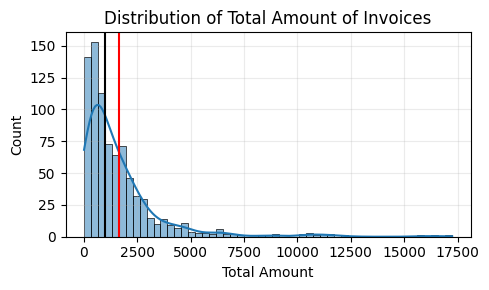

In [11]:
# We need to know why mean > median, using histogram to know the shape of data
fig,ax = plt.subplots(1,1,figsize=(5,3),sharey=True)
#---------------------------------
sns.histplot(data=df, x='totalamount',ax=ax,kde=True)
ax.axvline(df.totalamount.mean(), color='r')
ax.axvline(df.totalamount.median(), color='black')
ax.set_title('Distribution of Total Amount of Invoices')
ax.set_xlabel('Total Amount')

#-------------------------------
plt.grid(alpha=0.25)
plt.tight_layout()

<Axes: xlabel='totalamount'>

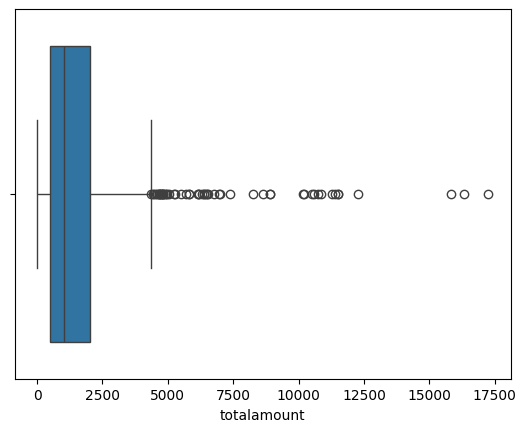

In [12]:
sns.boxplot(data=orders,x='totalamount')

In [13]:
# Boxplot to know the 5 number summary
px.box(data_frame=df,x='totalamount')

## Outlier Data

In [14]:
orders[orders.totalamount > ub].sample(5)

,customerid,firstname,lastname,city,country,orderid,ordernumber,orderdate,totalamount
1013,20,Roland,Mendel,Graz,Austria,386,542763,2013-08-15,"6,483.05"
1099,68,Michael,Holz,Genève,Switzerland,419,542796,2013-09-12,"4,666.94"
298,7,Frédérique,Citeaux,Strasbourg,France,113,542490,2012-11-22,"7,390.20"
1817,10,Elizabeth,Lincoln,Tsawassen,Canada,702,543079,2014-03-13,"4,422.00"
1171,63,Horst,Kloss,Cunewalde,Germany,447,542824,2013-10-06,"4,825.00"


###  In this case we will take any order less than 15000K other is outlires

In [15]:
print ("Number Of Outliers Data Sample is ")
orders[orders.totalamount > ub].count()

Number Of Outliers Data Sample is 


customerid     56
firstname      56
lastname       56
city           56
country        56
orderid        56
ordernumber    56
orderdate      56
totalamount    56
dtype: int64

In [16]:
# Outliers orders totalamount more than 15000k  
orders[orders.totalamount > 15000].count()

customerid     3
firstname      3
lastname       3
city           3
country        3
orderid        3
ordernumber    3
orderdate      3
totalamount    3
dtype: int64

### Delete outlier more than 15000k 

In [17]:
# store all data less than 15000k in orders
orders= orders[orders.totalamount < 15000]

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   827 non-null    int32         
 1   firstname    827 non-null    object        
 2   lastname     827 non-null    object        
 3   city         827 non-null    object        
 4   country      827 non-null    object        
 5   orderid      827 non-null    int32         
 6   ordernumber  827 non-null    int32         
 7   orderdate    827 non-null    datetime64[ns]
 8   totalamount  827 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(3), object(4)
memory usage: 54.9+ KB


### Boxplot After remove outlier more than 15000 k

In [19]:
# Boxplot to know the 5 number summary
px.box(data_frame=orders,x='totalamount')

## Categorical Data
* ### City
* ### country

# Univariate Analysis

## Extract the `City` and `Country` with the Best Sales Using Bar Chart

In [20]:
px.bar(data_frame=orders.city.value_counts(), title='Distrbution of Cities')

In [21]:
px.bar(data_frame=orders.country.value_counts(), title='Distrbution of Countries')

## Extract the `Country` with the Best Sales Using Pie Chart

In [22]:
px.pie(data_frame=orders,names='country',title='Relative Frequency of Countries Sales')

# *First Conclusion*

### Through the preliminary analysis, we see that London is the City that has the largest share of purchasing our products our with 46 invoices, and that the United States(USA) and Germany are the most purchasing countries for our products with 121 invoices and 14.6% of our total sales.

### من خلال التحليل الأولى نرى أن لندن هى المدينة التى تمتلك أكبر حصة من شراء منتجاتنا بواقع 46 فاتورة , وأن الولايات المتحدة وألمانيا هما أكثر الدول شراء لمنتجاتنا بواقع 121 فاتورة بنسبة 14.6% من إجمالى مبعاتنا

## Bivariate Analysis
### Country vs. Total Amount
### Cities vs. Total Amount

In [23]:
country_group = orders.groupby('country',as_index=False)['totalamount'].sum().sort_values(by='totalamount',ascending=False)
country_group

,country,totalamount
19,USA,"247,245.08"
8,Germany,"227,390.63"
1,Austria,"139,496.63"
3,Brazil,"99,158.48"
7,France,"85,498.76"
20,Venezuela,"60,814.89"
18,UK,"60,616.51"
16,Sweden,"59,523.70"
9,Ireland,"57,317.39"
4,Canada,"55,334.10"


In [24]:
city_group = orders.groupby('city',as_index=False)['totalamount'].sum().sort_values(by='totalamount',ascending=False)
city_group

,city,totalamount
25,Graz,"113,236.68"
20,Cunewalde,"100,233.39"
9,Boise,"99,351.49"
18,Cork,"57,317.39"
35,London,"54,470.21"
2,Albuquerque,"52,245.90"
56,Sao Paulo,"45,786.37"
52,Rio de Janeiro,"38,189.18"
10,Br?cke,"32,555.55"
41,Montréal,"32,203.90"


### build function help to plot relation between any column name and `Total Amount` 

In [25]:
def plots(columname,Top10=False):
    
    # Proportion of each country's total amount = sum of total amount of each country / sum of all total amount
    prop = orders.groupby(columname,as_index=False)['totalamount'].sum()
    prop['proportion'] = (prop.totalamount / orders.totalamount.sum())*100
    prop = prop.sort_values('proportion',ascending = False)
    print('Describe of all Total Amount Values ', prop.totalamount.describe())
    if Top10 == True:
        prop = prop.head(10)

    fig1 = px.bar(data_frame= prop, x=columname, y='totalamount')
    fig2 = px.pie(data_frame= prop , names=columname,values='totalamount')

    fig1.show()
    fig2.show() 

In [26]:
plots('country')

Describe of all Total Amount Values  count        21.00
mean     62,146.51
std      67,460.19
min       3,531.95
25%      19,431.89
50%      35,134.98
75%      60,814.89
max     247,245.08
Name: totalamount, dtype: float64


In [27]:
plots('city',Top10=True)

Describe of all Total Amount Values  count        69.00
mean     18,914.15
std      22,692.99
min         357.00
25%       4,788.06
50%      11,830.10
75%      23,850.95
max     113,236.68
Name: totalamount, dtype: float64


# *Second Conclusion*
### The second summary, after what we saw in the first summary, is that `London City` has the largest  share of the purchase of our products, with `46 invoices`, but after combining the prices of these invoices, we found that it occupies `fifth place` with a total invoice price of `54.4702k`, at a rate of `8.71%`, while the city of `Graz City` came in `first place` with total invoice prices. = `113.2367k`, `18.1%`. While the `USA Country` leads with a total of   `247.245k` invoices, or `18.9%`, after it was equal to `Germany Country` in the number of invoices with `121 invoices`.

### الملخص الثانى بعد ما رأينا فى الملخص الاول ان لندن تمتلك أكبر حصة من شراء منتجاتنا بواقع 46 فاتورة لكن بعد دمج اسعار هذة الفواتير وجدنا انها تحتل المركز الخامس ب مجموع اسعار فواتير 54.4702 الف و بنسبة 8.71% بينا جاء المدينة غراتس فى المركز الأول بمجموع اسعار فواتير = 113.2367 الف بنسبة 18.1% . بينما تتصدر دولة الولايات المتحدة الامريكية بجموع فواتير 247.245 الف وبنسبة 18.9 % بعد ما كانت تتساوى مع المانيا فى عدد الفواتير بعدد 121 فاتورة 

# OrderDate vs. Total Amount
* ### we will using Time seires

In [28]:
date_total = orders[['orderdate','totalamount']]
date_total= date_total.set_index('orderdate')

In [29]:
px.line(data_frame=date_total)

In [30]:
# resample in pyhton = groupby in SQL in this case we want groupby month
date_total = date_total.totalamount.resample(rule = '1M').sum()
date_total.head()

C:\Users\omar\AppData\Local\Temp\ipykernel_20660\3315661275.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



orderdate
2012-07-31   30,192.10
2012-08-31   26,609.40
2012-09-30   27,636.00
2012-10-31   41,203.60
2012-11-30   49,704.00
Freq: ME, Name: totalamount, dtype: float64

In [31]:
px.line(data_frame=date_total)

## OrderDate and Country

In [30]:
date_country = orders[['orderdate', 'country']]
date_country = date_country.set_index('orderdate')
# resample in pyhton = groupby in SQL in this case we want groupby month
date_country = date_country.country.resample(rule = '1M').nunique()
date_country.head()

C:\Users\omar\AppData\Local\Temp\ipykernel_21936\1229927432.py:4: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



orderdate
2012-07-31    11
2012-08-31    11
2012-09-30    11
2012-10-31    13
2012-11-30    11
Freq: ME, Name: country, dtype: int64

In [31]:
px.line(data_frame=date_country,y= 'country')

# *Third Conclusion*
### peak sales day in 4/12/2012 by = 12.2812k per day.
### Most No.of countries purchasing our Products in April,2014 by 21 countries per month.
### Alse see in Apr,2014 have peak sales by = 118.3087k. So in Apr,2014 has peak total amount sales and most No.of countries purchasing our product per Month.

 ### ذروة المبيعات في يوم 12/4/2012 بمقدار = 12.2812 ألفًا لكل يوم.
 ### معظم الدول التي اشترت منتجاتنا في أبريل 2014 بواقع 21 دولة لكل شهر. 
 ### انظر أيضًا في أبريل 2014 أن ذروة المبيعات بلغت = 118.3087 ألفًا. لذلك، في أبريل 2014، بلغت المبيعات ذروة إجمالي المبيعات ومعظم الدول التي تشتري منتجاتنا لكل شهر.

## Customer and Total Amount

In [32]:
cust_orders = {
    'fullname': orders.firstname + ' ' + orders.lastname,
    'totalamount' : orders.totalamount
}
cust_orders = pd.DataFrame(cust_orders)
cust_orders.head()

,fullname,totalamount
0,Paul Henriot,440.00
3,Karin Josephs,"1,863.40"
5,Mario Pontes,"1,813.00"
8,Mary Saveley,670.80
11,Pascale Cartrain,"3,730.00"


### Count Order Per Each Customer

In [33]:
fig = px.bar(data_frame=cust_orders.groupby('fullname')['totalamount'].count().sort_values(ascending=False).head(10),
             text_auto=True,title='No. of orders per customer',labels={'fullname': 'Full Name','value': 'Frequency'})

# customize aspect
fig.update_traces(marker_color='rgb(2,113,151)',marker_line_color='rgb(231,123,15)',
                  marker_line_width=1.5,opacity=0.6,textposition='inside')


### Sum Total Amount For each Customer

In [34]:
fig = px.bar(data_frame=cust_orders.groupby('fullname')['totalamount'].sum().sort_values(ascending=False).head(10),
             text_auto=True,title='Total Sum orders per customer',labels={'fullname': 'Full Name','value': 'Total Amount'})

# customize aspect
fig.update_traces(marker_color='rgb(2,113,151)',marker_line_color='rgb(231,123,15)',
                  marker_line_width=1.5,opacity=0.6,textposition='inside')

# *Forth Conclusion* 
### In this case we show relation between No.of order and Total amount Per Customer.
### and we see Most Customer purchase orders is to `Jose pavarotti` and `Roland Mendel` by `30` order .
### but when we see Total Amount for this orders we found Most Customer purchase orders by sum = `113.2367k` is to `Roland Mendel` but `Jose Pavarotti` he is located in third place by `99.3515k`.
## So The most customer Purchasing is `Roland Mendel` by `30 orders` In Total is `113.2367k`.

في هذه الحالة نظهر العلاقة بين رقم الطلب والمبلغ الإجمالي لكل عميل.
ونرى أن معظم طلبات الشراء للعملاء كانت لـ `Jose pavarotti` و`Roland Mendel` بواقع`30`" طلبًا.
ولكن عندما نرى المبلغ الإجمالي لهذه الطلبات وجدنا أن معظم طلبات شراء العملاء حسب المبلغ = `113.2367` `تعود إلولاند مند` ولكن `خوسيه بافاروتي` يقع في المركز الثالث بمبلغ `99.3515 لفًا`.
لذا فإن أكثر العملاء شراءً هو `Roland Mendel` بـ "`30` طلبًا بإجمالي `113.2367` ألفًا". 

# Multivariate Analysis

* ### Country With OrderDate and TotalAmount
### We interested in knowing the number of countries and the grand total amount of them per month

In [35]:
multivar = orders[['orderdate','country','totalamount']]
# set orderdate to index to convirt to Time Series
multivar = multivar.set_index('orderdate')
multivar.head()

,country,totalamount
orderdate,,
2012-07-04,France,440.00
2012-07-05,Germany,"1,863.40"
2012-07-08,Brazil,"1,813.00"
2012-07-08,France,670.80
2012-07-09,Belgium,"3,730.00"


In [36]:
# agg = aggregate function this count number of countries in this month and sum total amount in this month
multivar = multivar.resample('1ME').agg({'country':'nunique','totalamount':'sum'})
multivar.head()

,country,totalamount
orderdate,,
2012-07-31,11,"30,192.10"
2012-08-31,11,"26,609.40"
2012-09-30,11,"27,636.00"
2012-10-31,13,"41,203.60"
2012-11-30,11,"49,704.00"


In [37]:
fig = px.bar(data_frame=multivar, x=multivar.index,y=round(multivar.totalamount,0),color=multivar.country,text_auto=True,
             title='Grand total amount of all countries per Month', labels={"orderdate":"Order Date",'y':'Total Amount'})
fig.update_traces(textposition = 'outside')
fig.update_layout(title_x= 0.5)
fig.show()

### Another view from Grand Total Amount of each Country per Month

In [38]:
multivar = orders[['orderdate','country','totalamount']]

In [39]:
multivar.head()

,orderdate,country,totalamount
0,2012-07-04,France,440.00
3,2012-07-05,Germany,"1,863.40"
5,2012-07-08,Brazil,"1,813.00"
8,2012-07-08,France,670.80
11,2012-07-09,Belgium,"3,730.00"


In [40]:
multivar.orderdate = multivar.orderdate.dt.to_period('M')

C:\Users\omar\AppData\Local\Temp\ipykernel_21936\1183903935.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
multivar.head()

,orderdate,country,totalamount
0,2012-07,France,440.00
3,2012-07,Germany,"1,863.40"
5,2012-07,Brazil,"1,813.00"
8,2012-07,France,670.80
11,2012-07,Belgium,"3,730.00"


In [42]:
multivar = multivar.groupby(['orderdate','country'],as_index=False)['totalamount'].sum().sort_values(by='totalamount',ascending=False)
multivar.head()

,orderdate,country,totalamount
255,2014-01,USA,"27,594.45"
166,2013-07,USA,"26,022.30"
300,2014-04,Germany,"22,584.49"
249,2014-01,Germany,"22,135.55"
206,2013-10,Germany,"22,079.05"


In [43]:
multivar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 322 entries, 255 to 228
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   orderdate    322 non-null    period[M]
 1   country      322 non-null    object   
 2   totalamount  322 non-null    float64  
dtypes: float64(1), object(1), period[M](1)
memory usage: 10.1+ KB


In [44]:
# convert data type (orderdate ) from period[M] to datetime64[ns]
multivar.orderdate =multivar.orderdate.astype('datetime64[ns]')

In [45]:
px.scatter(data_frame=multivar,x=multivar.orderdate,y='totalamount',color='country',size='totalamount')

In [48]:
px.bar(data_frame=multivar,x=multivar.orderdate,y='totalamount',color='country')

# *Fifth Conclution* 
### we apply relation between Date and Country and Total Amount.
### first we show most Date have most number of country purchasing order in this month  `Apr , 2014` by `21 countries` by Total `118.309k`.
### Then we need see most Country Purchasing in all Month and we found the `USA` is the most country by `27594.45k` in `Jan, 2014` and also this country top in most months.
### and we found the `Germany` top ranking also in most Months.

نحن نطبق العلاقة بين التاريخ والبلد والمبلغ الإجمالي
نعرض أولاً التاريخ الذي يحتوي على أكبر عدد من طلبات الشراء في هذا الشهر `أبريل 2014` بواسطة `21 دولة` بإجمالي `118.309 ألف`.
ثم نحتاج إلى رؤية معظم مشتريات الدولة في كل شهر ووجدنا أن `الولايات المتحدة الأمريكية` هي أكثر دولة بمقدار `27594.45 ألفًا` في `يناير 2014`، كما أن هذا البلد يتصدر القائمة في معظم الأشهر.
ووجدنا أن `ألمانيا` تتصدر الترتيب أيضًا في معظم الأشهر.


# ***Final Conclusion***

1. **City and Country Insights**:
   - `London` City has the largest share of purchasing our products with `46` invoices.
   - The United States `(USA)` and `Germany` are the most purchasing countries for our products, with `121` invoices and `14.6%` of our total sales.

2. **Invoice Price and City Ranking**:
   - Although `London` City has the largest number of invoices `(46)`, when we combine the prices of these invoices, it occupies `fifth place` with a total invoice price of `54.4702k (8.71%)`.
   - `Graz City` ranks first in total invoice prices with `113.2367k (18.1%)`.
   - The `USA` leads with a total of `247.245k invoices (18.9%)`, equal to `Germany's` `121` invoices.

3. **Sales Trends**:
   - The peak sales day occurred on `4/12/2012`, with a total of `12.2812k` per day.
   - In `April 2014`, `21 countries` made purchases, resulting in a peak total amount of `118.3087k`. `April 2014` had the highest total sales and the most countries purchasing our product per month.

4. **Customer Insights**:
   - Most customer purchase orders are from `Jose Pavarotti` and `Roland Mendel` `(both with 30 orders)`.
   - However, when considering the total amount spent, `Roland Mendel` leads with `113.2367k`, while `Jose Pavarotti` is in third place with `99.3515k`.

5. **Country Analysis**:
   - In `April 2014`, `21 countries` made purchases, totaling `118.309k`.
   - The `USA` consistently ranks as the top country, with `27,594.45k` in `January 2014` and leading in most other months.
   - `Germany` also ranks highly in most months.

**Suggestion**:
Considering the insights above, I recommend focusing on strategies to further engage customers in `London` and `Graz`, optimizing pricing for high-value customers like `Roland Mendel`, and exploring growth opportunities in the `USA` and `Germany` markets.

